In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

data = pd.read_csv('C:\\Users\\nabhe\\OneDrive\\Desktop\\Housing.csv')

stats = data[['price', 'area']].describe()
print("Stats:\n", (stats.round(2)))

#medians:
median = data[['price', 'area']].median()
print("median:\n", (median.round(2)))

#skewness
skewness = data[['price', 'area']].skew()
print("skewness:\n", (skewness.round(2)))

#kurtosis
kurtosis = data[['price', 'area']].kurt()
print("kurtosis:\n", (kurtosis.round(2)))

#correlation
correlation = data['price'].corr(data['area'])
print("Correlation between price and area is ", correlation.round(2))

Stats:
              price      area
count       545.00    545.00
mean    4766729.25   5150.54
std     1870439.62   2170.14
min     1750000.00   1650.00
25%     3430000.00   3600.00
50%     4340000.00   4600.00
75%     5740000.00   6360.00
max    13300000.00  16200.00
medians:
 price    4340000.0
area        4600.0
dtype: float64
skewness:
 price    1.21
area     1.32
dtype: float64
kurtosis:
 price    1.96
area     2.75
dtype: float64
Correlation between price and area is  0.54


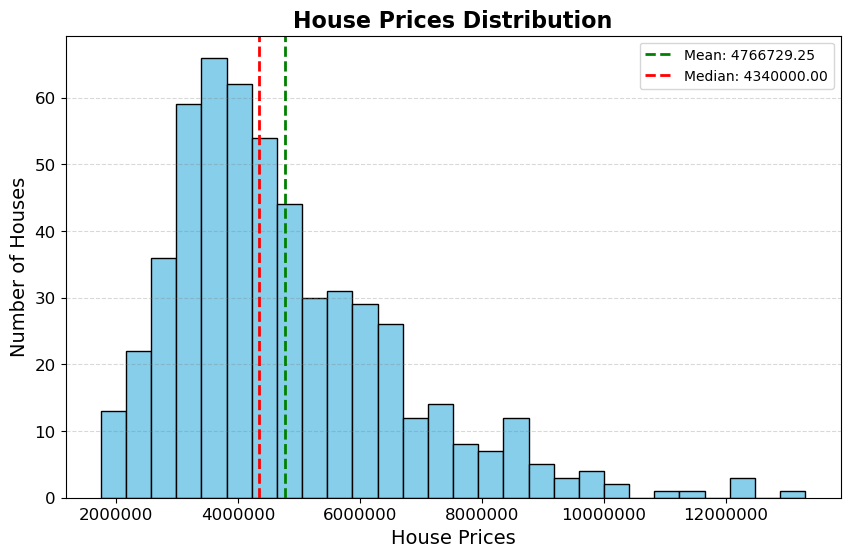

In [45]:
# 1) Creating histogram using "price" datas
data_price = data['price']

# Calculating mean and median values
mean_value = np.mean(data_price)
median_value = np.median(data_price)

def plot_histogram():
    """
    Creates a histogram using house prices and number of houses datas
    """
    # Fixing figure size and resolution
    plt.figure(figsize= (10, 6))
    
    # Create the histogram 
    plt.hist(data_price, bins= 28 , color= 'skyblue', edgecolor= 'black')
    
    #label axes, ticks and title
    plt.xlabel('House Prices', fontsize= 14, color= 'black')
    plt.ylabel('Number of Houses', fontsize= 14, color= 'black')
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.title('House Prices Distribution', fontsize= 16, fontweight= 'bold')
    plt.grid(axis='y', linestyle='--', color='gray', alpha=0.3)
    plt.ticklabel_format(style='plain', axis='x')  # Turns off scientific notation on the x-axis

    #show mean and median values using different colours with legend
    plt.axvline(mean_value, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    plt.legend()

    #saving histogram in jpg format for report
    plt.savefig("histogram.jpg", format="jpg")
    
    #show the histogram
    plt.show()
    return

plot_histogram()

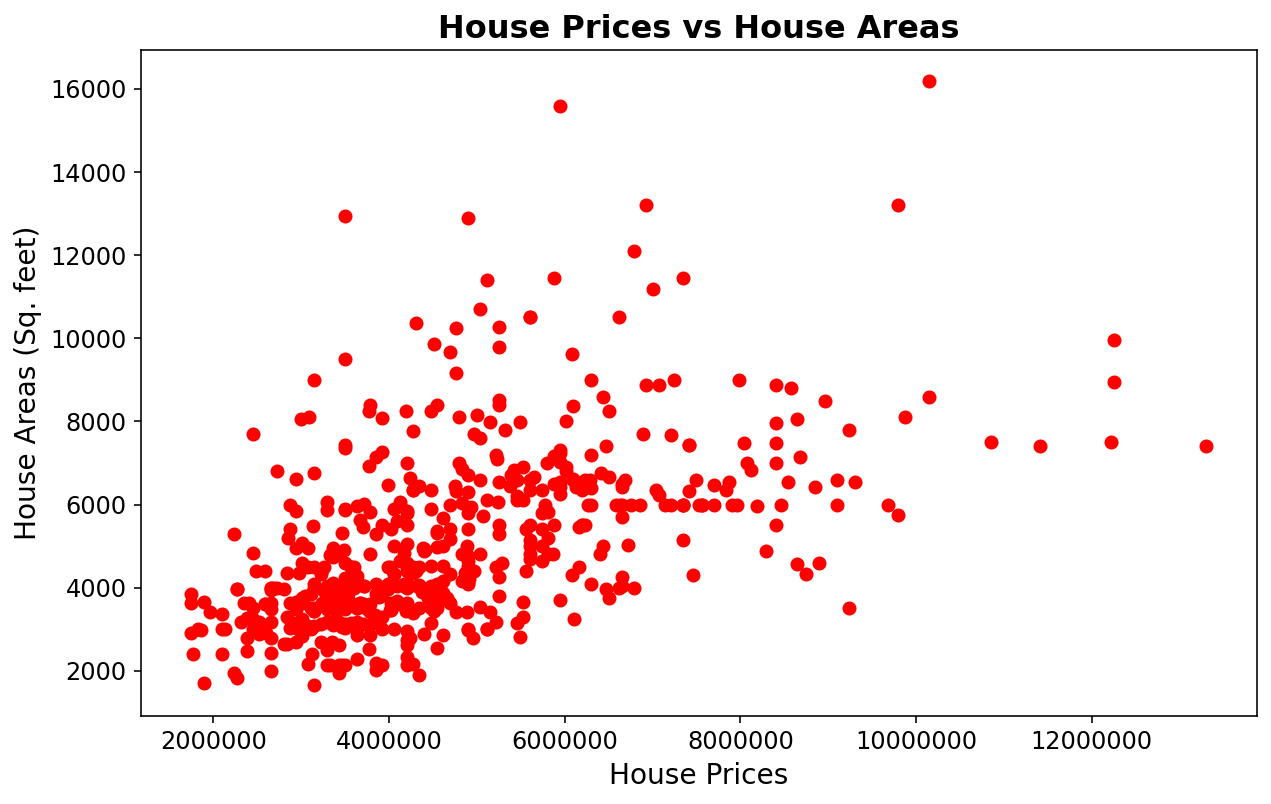

In [47]:
# 2) Creating scatter plot using house prices and areas datas
x = data['price']
y = data['area']

#define function with docstring
def plot_scatter(x, y):
    """
    Create scatter plot of x(House prices) and y(House areas) 
    """
    # Fixing figure size and resolution
    plt.figure(figsize= (10, 6), dpi= 144)

    # Scatter plot
    plt.scatter(x, y, color = 'red')

    # Labeling axes
    plt.xlabel('House Prices', fontsize= 14)
    plt.ylabel('House Areas (Sq. feet)', fontsize= 14)
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.title('House Prices vs House Areas', fontsize= 16, fontweight= 'bold')
    plt.ticklabel_format(style='plain', axis='x')  # Turns off scientific notation on the x-axis


    # Saving scatter plot in jpg format for report
    plt.savefig("scatter.jpg", format="jpg")

    # Show scatter plot
    plt.show()
    return

plot_scatter(x, y)

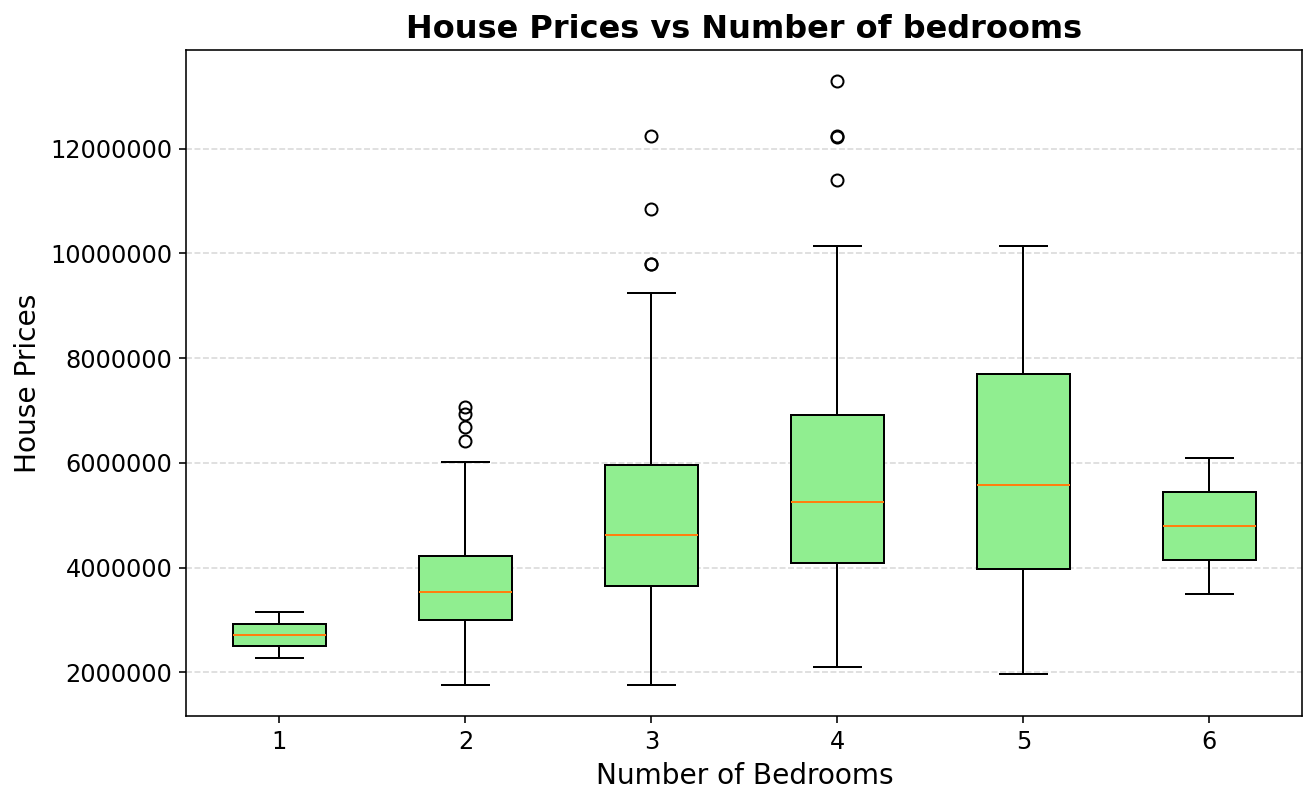

In [49]:
# 3) Create boxplot using house prices and number of bedrooms

# Organize data by bedroom counts
bedrooms = sorted(set(data['bedrooms']))  # Get unique bedroom counts
price_by_bedroom = [[data['price'][i] for i in range(len(data['bedrooms'])) if data['bedrooms'][i] == b] for b in bedrooms]

# Define function with docstring
def plot_box():
    """
    creates box plot of number of bedrooms and house prices
    """
    # Fixing figure size and resolution
    plt.figure(figsize= (10, 6), dpi= 144)

    # Box plot
    plt.boxplot(price_by_bedroom, labels= bedrooms, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

    # Labeling axes
    plt.xlabel('Number of Bedrooms', fontsize= 14)
    plt.ylabel('House Prices', fontsize= 14)
    plt.title('House Prices vs Number of bedrooms', fontsize= 16, fontweight= 'bold')
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.grid(axis='y', linestyle='--', color='gray', alpha=0.3)
    plt.ticklabel_format(style='plain', axis='y')  # Turns off scientific notation on the y-axis

    # Saving box plot in jpg format for report
    plt.savefig("boxplot.jpg", format="jpg")

    # Show box plot
    plt.show()
    return

plot_box()

C:\Users\nabhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nabhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nabhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nabhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

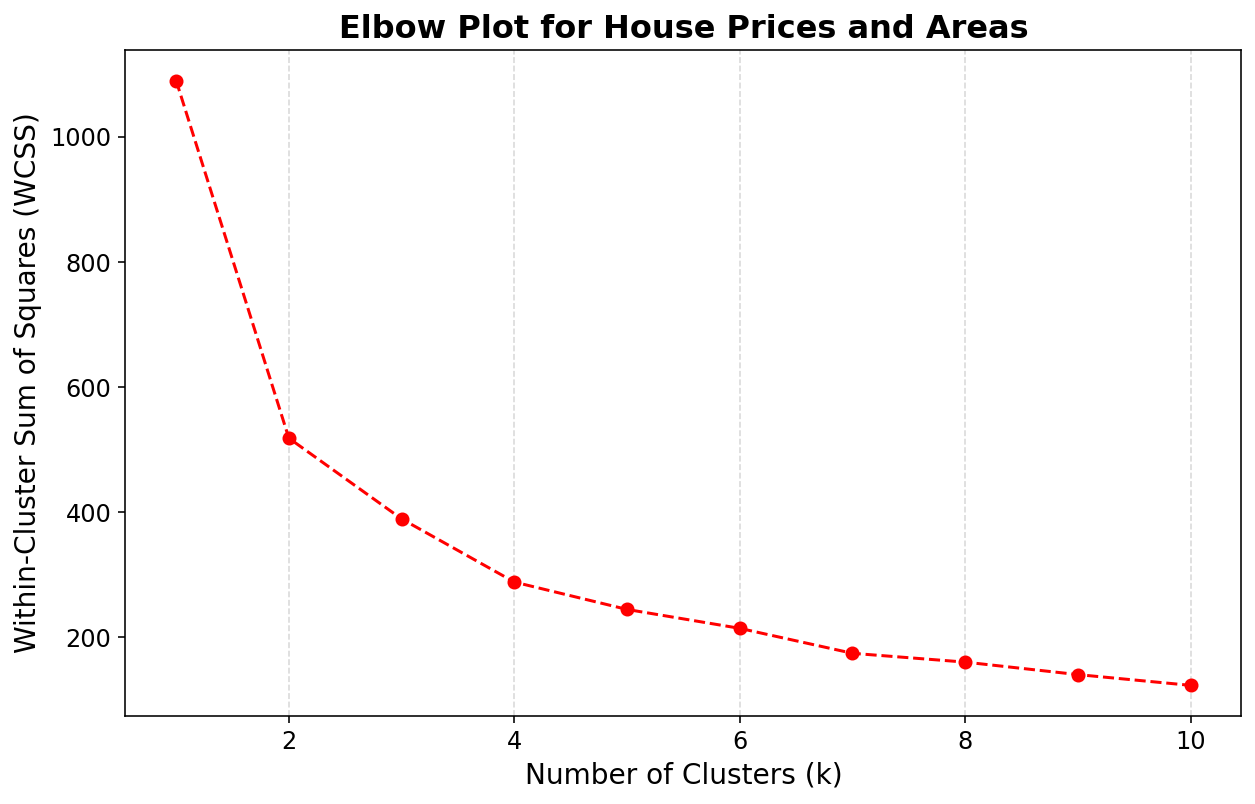

In [50]:
# 4) Create elbow plot using house prices and areas

# Convert to numpy array
X = np.array(list(zip(data['price'], data['area'])))

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute WCSS for different number of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Define function with docstring
def plot_elbow():
    """
    Create elbow plot using house prices and areas datas
    """
    # Fixing figure size and resolution
    plt.figure(figsize=(10, 6), dpi= 144)

    # Elbow plot
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')

    # Labelling axes
    plt.xlabel('Number of Clusters (k)', fontsize= 14)
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize= 14)
    plt.title('Elbow Plot for House Prices and Areas', fontsize= 16, fontweight= 'bold')
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.grid(axis='x', linestyle='--', color='gray', alpha=0.3)

    # Saving box plot in jpg format for report
    plt.savefig("elbowplot.jpg", format="jpg")
    
    # Show box plot
    plt.show()
    return

plot_elbow()

C:\Users\nabhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nabhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nabhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nabhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

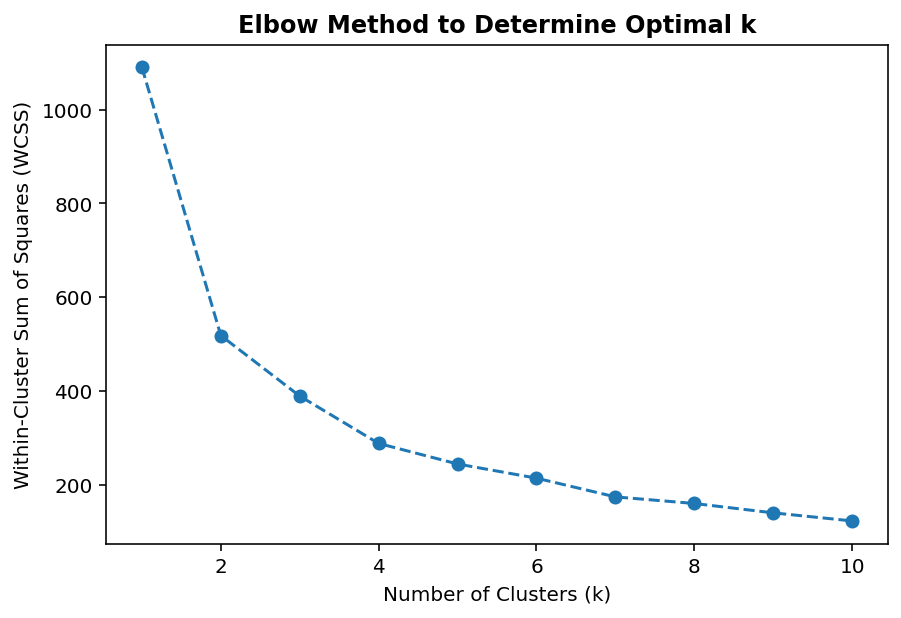

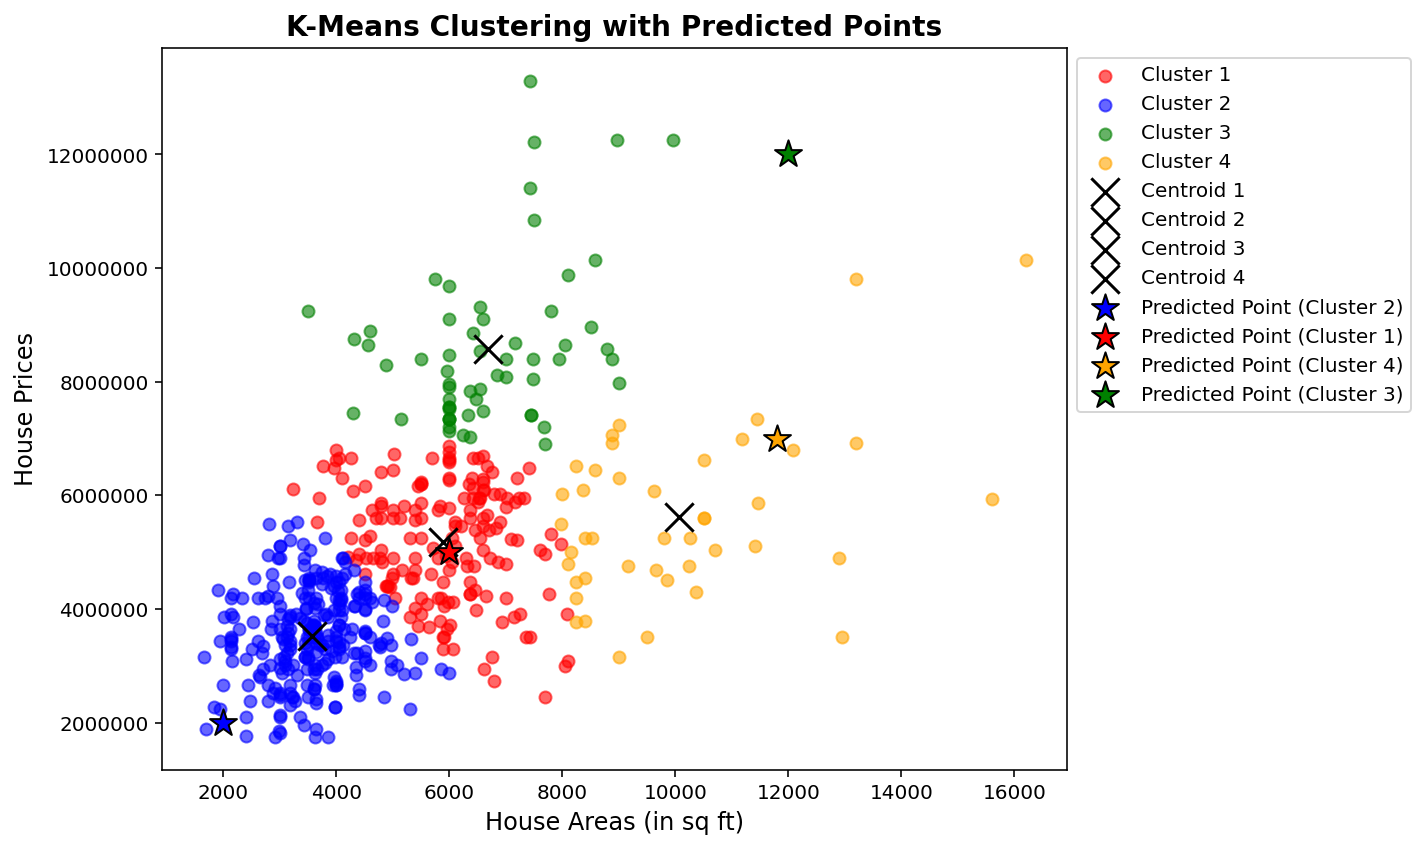

In [37]:
# Doing K-Means clustering with predicted points using house areas and prices datas

# Again using elbow method to calculate optimal number of clusters
# Simulate data with two features/variables ( price and area of houses)
feature1 =  data['area']  # area in sq ft
feature2 = data['price']  # price

# Combine into a DataFrame
mixed_data = pd.DataFrame({'Area': feature1, 'Price': feature2})

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(mixed_data)

# Use the Elbow Method to find the optimal number of clusters
wcss = []
k_range = range(1, 11)  # Test for k = 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


# Define function with docstring
def plot_elbow1():
    """
    Create elbow plot using house prices and areas datas
    """
    # Fixing figure size and resolution
    plt.figure(figsize=(7, 4.5), dpi= 144)

    # Elbow plot
    plt.plot(k_range, wcss, marker='o', linestyle='--')

    # Labelling axes
    plt.xlabel("Number of Clusters (k)", fontsize= 10)
    plt.ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize= 10)
    plt.title("Elbow Method to Determine Optimal k", fontsize= 12, fontweight= 'bold')

    # Check elbow plot by removing hash symbol before plt.show() below
    #plt.show()
    return

plot_elbow1()

# Apply KMeans with optimal k 
optimal_k = 4    # from the above elbow plot, optimal k is 4
kmeans = KMeans(n_clusters= optimal_k, random_state= 42)
kmeans.fit(scaled_data)

# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Back scale the centroids 
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

# Add predicted points and assign them to clusters
predicted_points = pd.DataFrame({'Area': [2000, 6000, 11800, 12000], 'Price': [2000000, 5000000, 7000000, 12000000]})

# Normalize predicted points
scaled_predicted_points = scaler.transform(predicted_points)

# Predict cluster assignments
predicted_points['Cluster'] = kmeans.predict(scaled_predicted_points)

# Define function with docstring:
def kMeans_clustering():
    """
    create k-means clustering with predicted points using house prices and areas datas
    """
    # Fixing figure size and resolution
    plt.figure(figsize=(10, 6), dpi= 144)
    
    # Visualize the clusters and predicted points
    colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for clusters
    for i in range(optimal_k):
        cluster_data = data[data['Cluster'] == i]
        plt.scatter(cluster_data['area'], cluster_data['price'], 
                    label=f"Cluster {i+1}", color=colors[i], alpha=0.6)
    
    # Plot the centroids
    for idx, (x, y) in enumerate(centroids_original):
        plt.scatter(x, y, color='black', marker='x', s=200, label=f"Centroid {idx+1}")
    
    # Plot the predicted points with their cluster labels
    for _, row in predicted_points.iterrows():
        plt.scatter(row['Area'], row['Price'], color=colors[row['Cluster']],
                    edgecolor='black', marker='*', s=200, label=f"Predicted Point (Cluster {row['Cluster']+1})")

    # lebelling axes
    plt.xlabel("House Areas (in sq ft)", fontsize= 12)
    plt.ylabel("House Prices", fontsize= 12)
    plt.title("K-Means Clustering with Predicted Points", fontsize= 14, fontweight= 'bold')
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.ticklabel_format(style='plain', axis='y')  # Turns off scientific notation on the y-axis
    plt.tight_layout()

    # Check k-means clustering with predicted points plot by removing hash symbol before plt.show() below
    #plt.show()
    return

kMeans_clustering()


Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           7.39e-42
Time:                        21:19:06   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.387e+06   1.74e+05     

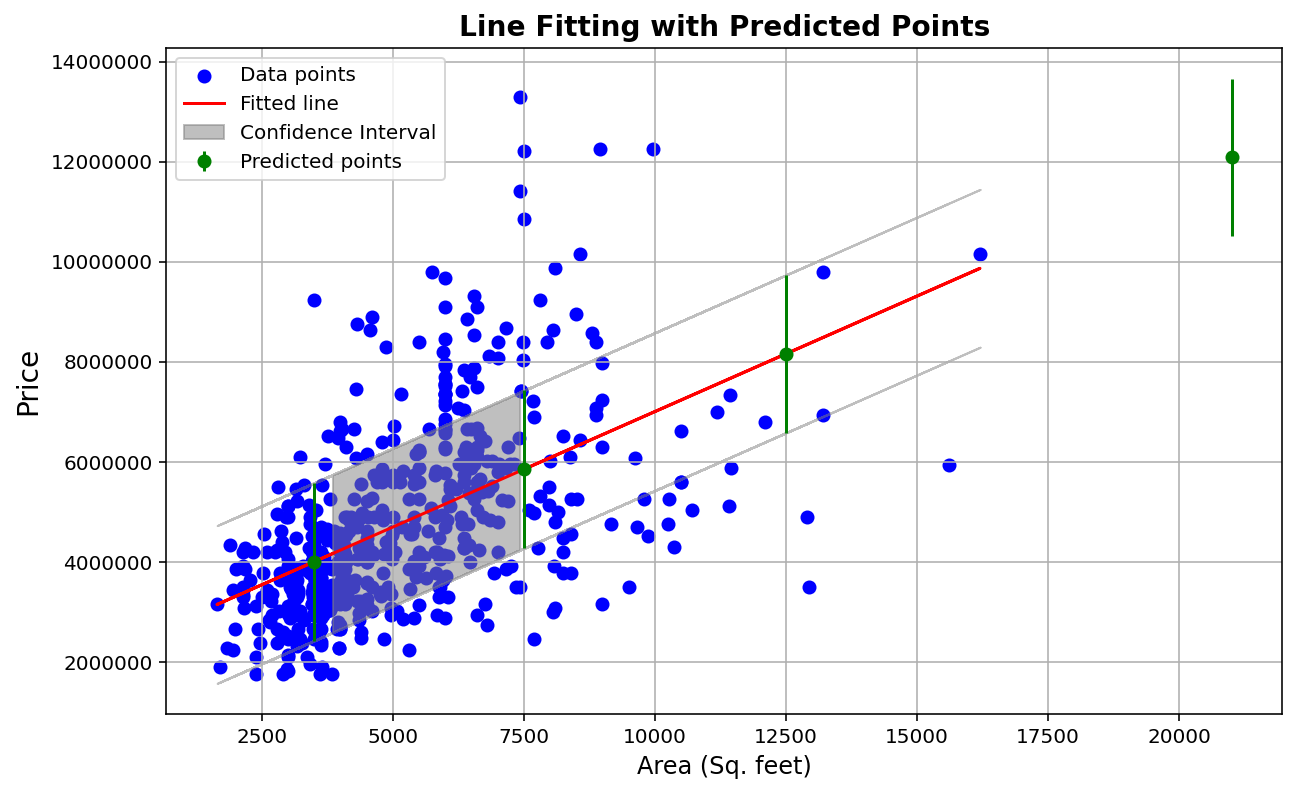

In [44]:
# Doing line fitting with predicted points 

# Define funciton with docstring
def line_fitting():
    """
    create line fitting with predicted points using house prices and areas datas
    """
    # Plot the data points
    plt.figure(figsize=(10, 6), dpi= 144)
    plt.scatter(data['area'], data['price'], color='blue', label='Data points')
    
    # Perform linear regression using statsmodels for confidence intervals
    X = data['area']
    y = data['price']
    
    # Add constant term (intercept) for statsmodels
    X = sm.add_constant(X)
    
    # Fit the model
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Get the fitted line
    line = results.fittedvalues
    plt.plot(data['area'], line, color='red', label='Fitted line')
    
    # Get the confidence intervals
    conf = results.conf_int(alpha= 0.05)
    
    # Make predictions for some new points
    predicted_areas = np.array([3500, 7500, 12500, 21000])
    predicted_areas_const = sm.add_constant(predicted_areas)  # Add constant for intercept
    
    # Predictions
    predicted_prices = results.predict(predicted_areas_const)
    
    # Calculate the prediction error (standard errors of the regression)
    predict_std_err = np.sqrt(np.mean((y - results.fittedvalues)**2))
    
    # Add predictions with error bars
    plt.errorbar(predicted_areas, predicted_prices, yerr=predict_std_err, fmt='o', color='green', label='Predicted points')
    
    # Plot with the confidence intervals for predictions
    plt.fill_between(data['area'], line - predict_std_err, line + predict_std_err, color='gray', alpha=0.5, label='Confidence Interval')
    
    # Labelling axes
    plt.xlabel('Area (Sq. feet)', fontsize= 12)
    plt.ylabel('Price', fontsize= 14)
    plt.title('Line Fitting with Predicted Points', fontsize= 14, fontweight= 'bold')
    plt.legend()
    plt.grid(True)
    plt.ticklabel_format(style='plain', axis='y')  # Turns off scientific notation on the y-axis
    
    # Check line fitting plot by removing hash symbol before plt.show() below
    #plt.show()

line_fitting()

# Print the results for the linear regression
print("Model Summary:")
print(results.summary())

# Print the confidence intervals
print("\nConfidence intervals for the regression coefficients:")
print(conf)

# Calculate and display the predictions with their associated uncertainties
for area, price in zip(predicted_areas, predicted_prices):
    print(f"Predicted price for area {area}: {price:.2f} ± {predict_std_err:.2f}")
